# Heisenberg model for spin chain with PBCs
Consider the Hamiltonian:

$H=\sum\limits_{i=1}^N\sigma_i^x\sigma_{i+1}^x+\sigma_i^y\sigma_{i+1}^y+J_z\sigma_i^z\sigma_{i+1}^z$
, where $N=20$, $J_z=1$.

The energy of the ground state is: 

$E_0=-35.6175461195$

# Momentum optimmizer

## Preamble





In [1]:
# # memory footprint support libraries/code
# !ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
# !pip install gputil
# !pip install psutil
# !pip install humanize

# import psutil
# import humanize
import os
# import GPUtil as GPU


# def check_mem():
#     GPUs = GPU.getGPUs()
#     # XXX: only one GPU on Colab and isn’t guaranteed
#     gpu = GPUs[0]

#     process = psutil.Process(os.getpid())
#     print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), 
#           " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
    
#     print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, 
#                                                                                                 gpu.memoryUsed, 
#                                                                                                 gpu.memoryUtil*100, 
#                                                                                                 gpu.memoryTotal))

# print(end="\n\n")
# check_mem()

from google.colab import drive
drive.mount('/content/drive')

current_location = '/content/drive/My Drive/Coursework program/Examples/heisenberg_1d_symmetric'

assert os.path.exists(current_location), current_location + ' is not exists'

os.chdir(current_location)
print('Current location:', current_location)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Current location: /content/drive/My Drive/Coursework program/Examples/heisenberg_1d_symmetric


Considering the operator: {'Heisenberg1dSymmetric': {'Jz': 1.0, 'pbc': 1}}
Using the sampler: {'MetropolisHastings': {'nflips': 2, 'nmoves': 200000, 'nsweeps': 10000, 'sweepfactor': 1.0, 'thermfactor': 0.1}}
Using the optimizer: {'Momentum': {'learning_rate': 0.005, 'schedule_multiplier': 'fixed', 'momentum_factor': 0.9, 'SR': False, 'L2': {'L2_factor': 0.0001}}}


Start training...
{'Iteration': 1, 'sampler results': {'acceptance': 0.49922, 'energy error': 0.0934840010228622, 'energy mean': -22.076085107343854, 'nacceptance': 99844, 'taucorr': 0.532122468519508}, 'Time left': '32 min 59 s'}
{'Iteration': 2, 'sampler results': {'acceptance': 0.499815, 'energy error': 0.07663822618858801, 'energy mean': -22.255283746293095, 'nacceptance': 99963, 'taucorr': 0.3631560280975871}, 'Time left': '32 min 2 s'}
{'Iteration': 3, 'sampler results': {'acceptance': 0.499915, 'energy error': 0.08600548805696008, 'energy mean': -22.20545227678241, 'nacceptance': 99983, 'taucorr': 0.4705907486916248},

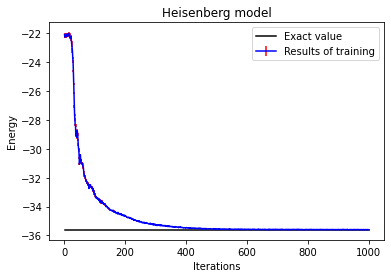

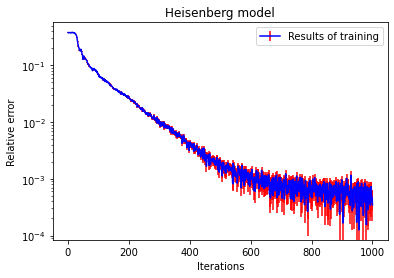

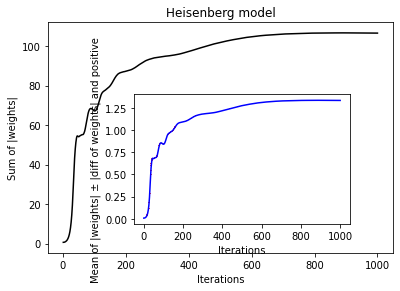

In [3]:
os.chdir(os.path.dirname(os.path.dirname(current_location) ) )
import ground
import ground.logging.plot as plot
os.chdir(current_location)

# enter the seed for the pseudo-random generator for constancy of results
seed = 3141592654
ground.randomizer.seed(seed)

# create a Neural-network Quantum States (NQS)
nqs = ground.machine.Nqs(n_visible=20, alpha=2)

# create a operator
heisenberg_1d_symmetric = ground.operator.Heisenberg1dSymmetric(nqs=nqs)

# create a sampler
metropolis_hastings = ground.sampler.MetropolisHastings(
    nqs=nqs, operator=heisenberg_1d_symmetric
)

# create a optimizer using stochastic gradient descent with SR method
momentum = ground.optimizer.Momentum(nqs=nqs, learning_rate=5e-3)
momentum.set_sr_params(SR=False)

# the name of data of the results of training and NQS
filename = "momentum"

# use variational Monte-Carlo method
vmc = ground.qmc.Vmc(nqs=nqs, operator=heisenberg_1d_symmetric,
                     sampler=metropolis_hastings,
                     optimizer=momentum, filename=filename)

# start training
vmc.run(num_iter=1000)

# the value of exact solution
exact = -35.6175461195

# plot training result
plot.energy_mean(num=1, filename=filename, title="Heisenberg model", exact=exact)
plot.relative_error(num=2, filename=filename, title="Heisenberg model", exact=exact)
plot.momentum(num=3, filename=filename, title="Heisenberg model")

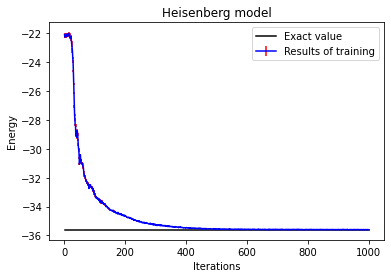

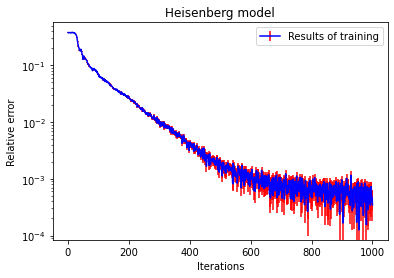

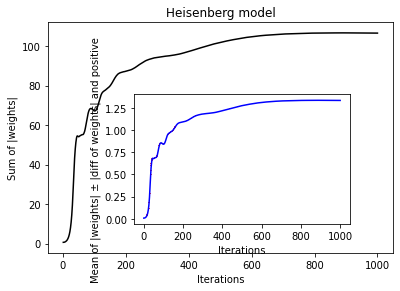

In [4]:
os.chdir(os.path.dirname(os.path.dirname(current_location) ) )
import ground
import ground.logging.plot as plot
os.chdir(current_location)

# the name of data of the results of training and NQS
filename = "momentum"

# the value of exact solution
exact = -35.6175461195

# plot training result
plot.energy_mean(num=1, filename=filename, title="Heisenberg model", exact=exact)
plot.relative_error(num=2, filename=filename, title="Heisenberg model", exact=exact)
plot.momentum(num=3, filename=filename, title="Heisenberg model")